In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [3]:
def plot_gpr_samples(gpr_model, n_samples, ax):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """
    #make predicition points the correct size for arnold

    X = np.linspace(0, 0.08, 53)

    # Reshape x_to_predict to have shape (1, 53)
    x = X.reshape(1, -1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7,
            label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", label="Mean")
    ax.fill_between(
        x,
        y_mean - y_std,
        y_mean + y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_ylim([-3, 3])

In [4]:
#function for sepearating data 
def separate_data(data):
    '''
    input: data as 4 collom array
    output: 4 separated vectors based on collum

    '''

    lines = data.strip().split('\n')
    COM = []
    COMerror = []
    sfactor = []
    sfactorerror = []

    for line in lines:
        parts = line.split()
        COM.append(float(parts[0]))
        COMerror.append(float(parts[1]))
        sfactor.append(float(parts[2]))
        sfactorerror.append(float(parts[3]))

    return COM, COMerror, sfactor, sfactorerror

In [5]:
#set up training data - Conner
conner_dat = """1.2420E-02  60e-6    1.3227E+01   0.13
    1.5480E-02  68e-6    1.5174E+01   0.15
    1.8600E-02  77e-6    1.5790E+01   0.16
    2.0700E-02  82e-6    1.7328E+01   0.17
    2.1780E-02  85e-6    1.7378E+01   0.17
    2.4900E-02  93e-6    1.8234E+01   0.18
    2.8020E-02  102e-6    1.9699E+01   0.20
    2.9100E-02  105e-6    2.0129E+01   0.20
    3.1200E-02  110e-6    2.1804E+01   0.22
    3.3240E-02  116e-6    2.2911E+01   0.23
    3.4260E-02  118e-6    2.1594E+01   0.21
    3.7380E-02  127e-6    2.3803E+01   0.24
    4.0500E-02  135e-6    2.5309E+01   0.25
    4.1580E-02  138e-6    2.5725E+01   0.26
    4.3680E-02  143e-6    2.5930E+01   0.26
    4.5720E-02  149e-6    2.5899E+01   0.26
    4.6800E-02  152e-6    2.5439E+01   0.25
    4.9980E-02  161e-6    2.6833E+01   0.27
    5.4180E-02  172e-6    2.5526E+01   0.26
    5.6220E-02  177e-6    2.6602E+01   0.27
    5.8260E-02  183e-6    2.5886E+01   0.26
    6.2400E-02  193e-6    2.4608E+01   0.25
    6.5400E-02  202e-6    2.3429E+01   0.23
    6.6600E-02  205e-6    2.2901E+01   0.23
    6.9000E-02  211e-6    2.1818E+01   0.22
    7.5000E-02  227e-6    1.9229E+01   0.20
    8.0400E-02  242e-6    1.6970E+01   0.17
    8.1600E-02  245e-6    1.6604E+01   0.17
    8.5800E-02  256e-6    1.4961E+01   0.15
    8.7600E-02  261e-6    1.4266E+01   0.14
    9.1800E-02  272e-6    1.2897E+01   0.13
    9.3600E-02  277e-6    1.2332E+01   0.12
    9.7200E-02  287e-6    1.1024E+01   0.11
    1.0020E-01  295e-6    1.0626E+01   0.11
    1.0380E-01  304e-6    9.9085E+00   0.10
    1.0980E-01  320e-6    8.9950E+00   0.09
    1.2300E-01  356e-6    6.7947E+00   0.07
    1.3620E-01  392e-6    5.4398E+00   0.05
    1.5060E-01  430e-6    4.4269E+00   0.04
    1.6560E-01  470e-6    3.5523E+00   0.04
    1.8120E-01  512e-6    2.8963E+00   0.03
    1.9740E-01  555e-6    2.5082E+00   0.03
    2.1420E-01  600e-6    2.1603E+00   0.02
"""
# Call separate_data function and unpack the returned tuples
connerCOM, connerCOMerror, connersfactor, connersfactorerror = separate_data(conner_dat)


In [6]:
#turning into arrays 
connerCOM = np.array(connerCOM)
connersfactor = np.array(connersfactor)
#reshapping arrays 
connerCOM = connerCOM.reshape(1, -1)
connersfactor = connersfactor.reshape(1, -1)

In [7]:
kernel = DotProduct() + WhiteKernel() # using this as a kernel to follow example 
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(connerCOM, connersfactor) #training GP model 

In [8]:
#now to define our "query points, start with x= 40"

# Assuming x_to_predict is a 1D array with length 43
x_to_predict = np.linspace(0, 0.2, 43)

# Reshape x_to_predict to have shape (1, 43)
x_to_predict = x_to_predict.reshape(1, -1)

In [9]:
#calling predicitions
conner1_mean_prediction, conner1_std_prediction = gpr.predict(x_to_predict, return_std=True, return_cov=False)

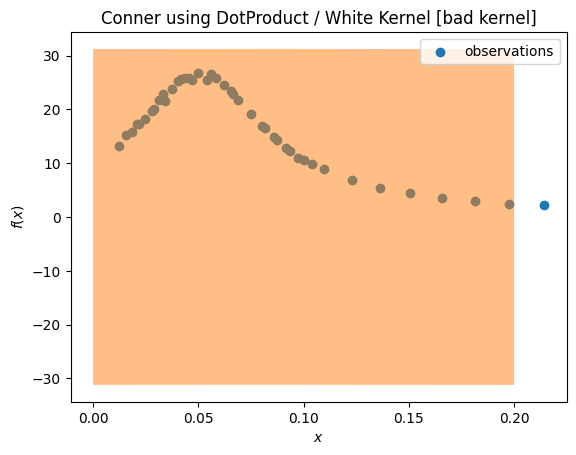

In [10]:


# Plotting

# Plot observation points
plt.scatter(connerCOM, connersfactor, label="observations")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Gaussian process regression on noise-free dataset")

# Plot prediction data
plt.plot(x_to_predict, conner1_mean_prediction, label="Mean prediction")
plt.fill_between(
    x_to_predict.flatten(),
    conner1_mean_prediction.flatten() - 1.68 * conner1_std_prediction.flatten(),
    conner1_mean_prediction.flatten() + 1.68 * conner1_std_prediction.flatten(),
    alpha=0.5,
    label=r"68% confidence interval",
)
#plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Conner using DotProduct / White Kernel [bad kernel]")

plt.show()  # Add this to display the plot

In [11]:
"""
I assume this is because of the kernel? we are seeing the STD to be way too large (this also answers the question
about the return function - the first return in the prediction, the second is the STD)
"""

'\nI assume this is because of the kernel? we are seeing the STD to be way too large (this also answers the question\nabout the return function - the first return in the prediction, the second is the STD)\n'

In [12]:
#Moving to new example! Arnold data

In [13]:
# Training on Arnold Data
arnold_dat = """0.029951   75.0e-6     21.766 0.021766
0.026383   75.0e-6     20.525   0.020525
0.026095   75.0e-6     20.277	0.020277
0.043292   75.0e-6     27.067	0.027067					
0.0093180  75.0e-6     13.703	0.027400					
0.020273   75.0e-6     17.721	0.035400					
0.031522   75.0e-6     22.695	0.022695					
0.014679   75.0e-6     15.753	0.031400					
0.037164   75.0e-6     25.184	0.025184					
0.025724   75.0e-6     20.596	0.020596					
0.025664   75.0e-6     19.920	0.019920					
0.037002   75.0e-6     24.967	0.024967					
0.014481   75.0e-6     14.939	0.030000					
0.031162   75.0e-6     22.749	0.022749					
0.019925   75.0e-6     17.249	0.034400					
0.0089763  75.0e-6     13.340	0.026700					
0.042495   75.0e-6     26.847	0.026847					
0.025322   75.0e-6     19.969	0.019969					
0.0095159  75.0e-6     13.600	0.027200					
0.0094739  75.0e-6     13.508	0.027000					
0.014894   75.0e-6     15.448	0.030000					
0.012826   75.0e-6     14.957	0.030000					
0.012808   75.0e-6     14.302	0.029000					
0.047250   75.0e-6     27.542	0.027542					
0.047220   75.0e-6     27.505	0.027505					
0.018348   75.0e-6     16.989	0.032000					
0.018330   75.0e-6     16.921	0.034000					
0.041254   75.0e-6     26.514	0.026514					
0.041230   75.0e-6     26.600	0.026600					
0.023973   75.0e-6     18.366	0.036000					
0.023955   75.0e-6     18.969	0.038000					
0.035383   75.0e-6     24.589	0.024589					
0.035359   75.0e-6     24.314	0.024314					
0.052826   75.0e-6     27.085	0.027085					
0.052796   75.0e-6     26.975	0.026975					
0.058678   75.0e-6     25.669	0.025669					
0.058660   75.0e-6     25.621	0.025621					
0.064543   75.0e-6     23.157	0.023157					
0.064513   75.0e-6     23.071	0.023071					
0.070443   75.0e-6     20.227	0.020227					
0.070395   75.0e-6     20.445	0.020445					
0.067391   75.0e-6     21.951	0.021951					
0.067373   75.0e-6     22.002	0.022002					
0.061431   75.0e-6     24.492	0.024492					
0.061395   75.0e-6     24.593	0.024593					
0.046650   75.0e-6     27.489	0.027489					
0.046638   75.0e-6     27.365	0.027365					
0.046614   75.0e-6     27.466	0.027466					
0.012034   75.0e-6     13.680	0.027000					
0.011992   75.0e-6     13.849	0.028000					
0.011950   75.0e-6     14.068	0.028000					
0.025262   75.0e-6     20.755	0.020755					
0.025166   75.0e-6     20.718	0.020718	

"""


# Now call separate_data function and unpack the returned tuples
arnoldCOM, arnoldCOMerror, arnoldsfactor, arnoldsfactorerror = separate_data(arnold_dat)




In [14]:
#turning into arrays 
arnoldCOM = np.array(arnoldCOM)
arnoldsfactor = np.array(arnoldsfactor)
#reshapping arrays 
arnoldCOM = arnoldCOM.reshape(1, -1)
arnoldsfactor = arnoldsfactor.reshape(1, -1)

In [15]:
# still using shitty kernel 
kernel = DotProduct() + WhiteKernel() # using the same kernel
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(arnoldCOM, arnoldsfactor) #training GP model 

In [16]:
#make predicition points the correct size for arnold

x_to_predict = np.linspace(0, 0.08, 53)

# Reshape x_to_predict to have shape (1, 53)
x_to_predict = x_to_predict.reshape(1, -1)

In [17]:
#calling predicitions
arnold1_mean_prediction, arnold1_std_prediction = gpr.predict(x_to_predict, return_std=True, return_cov=False)

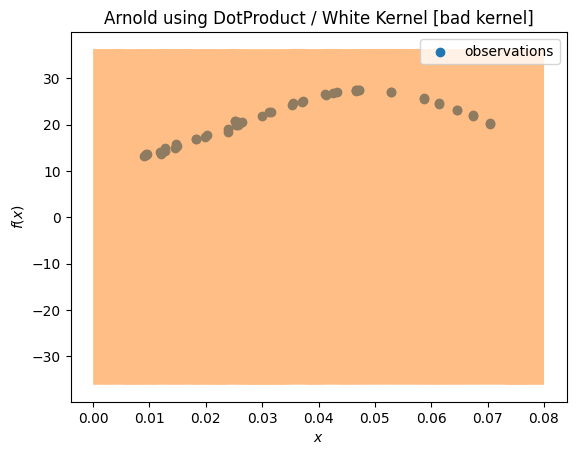

In [18]:

# Plotting

# Plot observation points
plt.scatter(arnoldCOM, arnoldsfactor, label="observations")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Gaussian process regression on noise-free dataset")

# Plot prediction data
plt.plot(x_to_predict, arnold1_mean_prediction, label="Mean prediction")
plt.fill_between(
    x_to_predict.flatten(),
    arnold1_mean_prediction.flatten() - 1.68 * arnold1_std_prediction.flatten(),
    arnold1_mean_prediction.flatten() + 1.68 * arnold1_std_prediction.flatten(),
    alpha=0.5,
    label=r"68% confidence interval",
)
#plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Arnold using DotProduct / White Kernel [bad kernel]")

plt.show()  # Add this to display the plot

In [19]:
#Now, try training on both arnold and conner data (seperately) and using the RBF kernel 
#using radial basis function as a kernel 
from sklearn.gaussian_process.kernels import RBF

In [20]:
#Conner data first 

ValueError: Expected 2D array, got 1D array instead:
array=[0.         0.00153846 0.00307692 0.00461538 0.00615385 0.00769231
 0.00923077 0.01076923 0.01230769 0.01384615 0.01538462 0.01692308
 0.01846154 0.02       0.02153846 0.02307692 0.02461538 0.02615385
 0.02769231 0.02923077 0.03076923 0.03230769 0.03384615 0.03538462
 0.03692308 0.03846154 0.04       0.04153846 0.04307692 0.04461538
 0.04615385 0.04769231 0.04923077 0.05076923 0.05230769 0.05384615
 0.05538462 0.05692308 0.05846154 0.06       0.06153846 0.06307692
 0.06461538 0.06615385 0.06769231 0.06923077 0.07076923 0.07230769
 0.07384615 0.07538462 0.07692308 0.07846154 0.08      ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

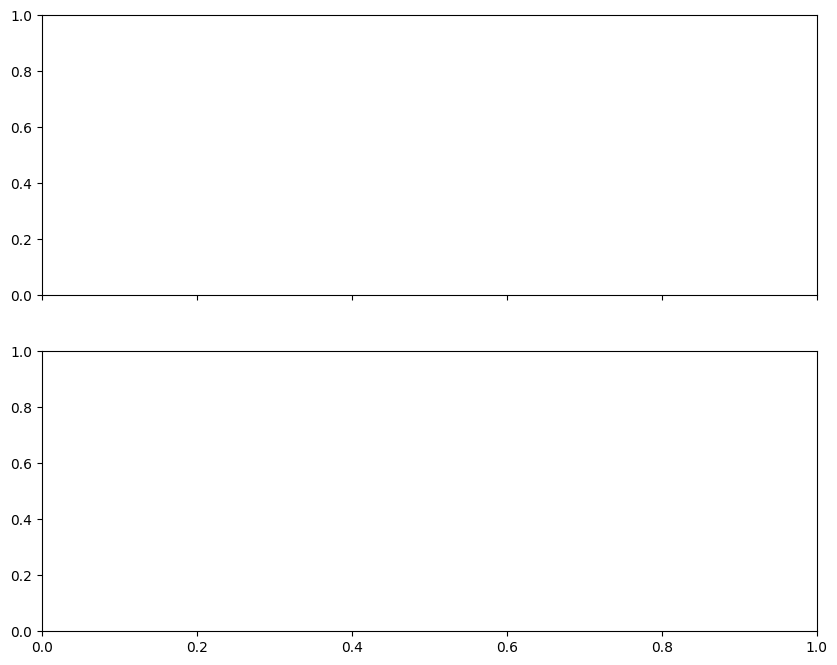

In [21]:
kernel = 1.0 * RBF(length_scale = 1, length_scale_bounds = [0.1,10])
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))
plot_gpr_samples(gpr,n_samples=5, ax = axs[0])

gpr.fit(connerCOM, connersfactor) #training GP model
#x = x.reshape(-1,1)
plot_gpr_samples(gpr,n_samples=5, ax = axs[1])

In [22]:
#now to define our "query points, start with x= 40"

# Assuming x_to_predict is a 1D array with length 43
x_to_predict = np.linspace(0, 0.2, 43)

# Reshape x_to_predict to have shape (1, 43)
x_to_predict = x_to_predict.reshape(1, -1)

In [23]:
#calling predicitions
conner2_mean_prediction, conner2_std_prediction = gpr.predict(x_to_predict, return_std=True, return_cov=False)

ValueError: x and y must be the same size

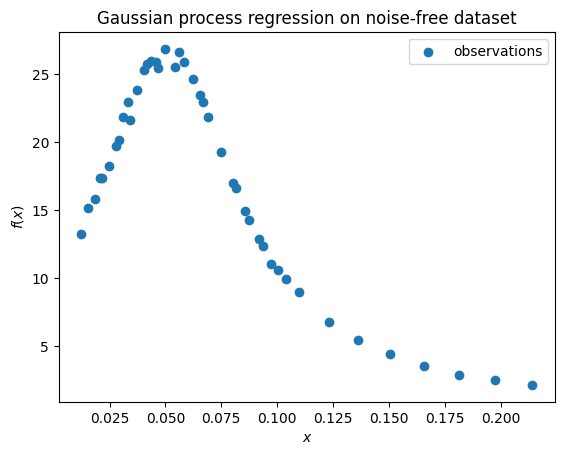

In [24]:


# Plotting

# Plot observation points
plt.scatter(connerCOM, connersfactor, label="observations")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Gaussian process regression on noise-free dataset")

plt.scatter(x_to_predict, conner2_mean_prediction, label = "mean")

# Plot prediction data
plt.plot(x_to_predict, conner2_mean_prediction, label="Mean prediction")
plt.fill_between(
    x_to_predict.flatten(),
    conner2_mean_prediction.flatten() - 1.98 * conner2_std_prediction.flatten(),
    conner2_mean_prediction.flatten() + 1.98 * conner2_std_prediction.flatten(),
    alpha= 0.3,
    label=r"98% confidence interval",
)
#plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Conner using RBD [better kernel(?)] - length scale = 1")

plt.show()  # Add this to display the plot

In [ ]:
#changing length scale shorter ... still using conner 

In [ ]:
kernel = 0.0001 * RBF(1)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(connerCOM, connersfactor) #training GP model

In [25]:
#calling predicitions
conner3_mean_prediction, conner3_std_prediction = gpr.predict(x_to_predict, return_std=True, return_cov=False)

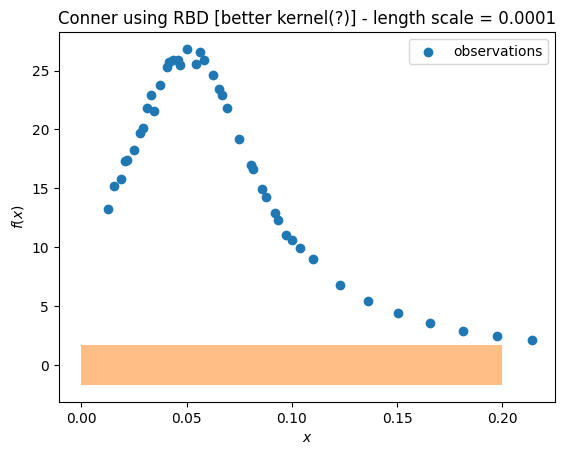

In [26]:

# Plotting

# Plot observation points
plt.scatter(connerCOM, connersfactor, label="observations")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Gaussian process regression on noise-free dataset")

# Plot prediction data
plt.plot(x_to_predict, conner3_mean_prediction, label="Mean prediction")
plt.fill_between(
    x_to_predict.flatten(),
    conner3_mean_prediction.flatten() - 1.68 * conner3_std_prediction.flatten(),
    conner3_mean_prediction.flatten() + 1.68 * conner3_std_prediction.flatten(),
    alpha=0.5,
    label=r"68% confidence interval",
)
#plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Conner using RBD [better kernel(?)] - length scale = 0.0001")

plt.show()  # Add this to display the plot

In [27]:
#now, for the arnold data with RBF kernel 

In [28]:
kernel = 1 * RBF(1)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(arnoldCOM, arnoldsfactor) #training GP model 

In [29]:
#make predicition points the correct size for arnold

x_to_predict = np.linspace(0, 0.08, 53)

# Reshape x_to_predict to have shape (1, 53)
x_to_predict = x_to_predict.reshape(1, -1)

In [30]:
#calling predicitions
arnold2_mean_prediction, arnold2_std_prediction = gpr.predict(x_to_predict, return_std=True, return_cov=False)

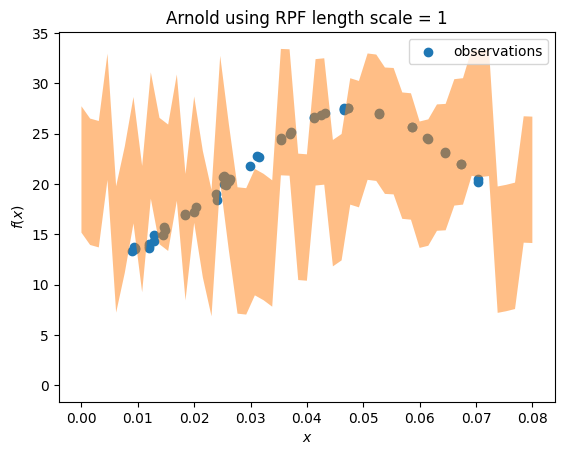

In [31]:

# Plotting

# Plot observation points
plt.scatter(arnoldCOM, arnoldsfactor, label="observations")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Gaussian process regression on noise-free dataset")

# Plot prediction data
plt.plot(x_to_predict, arnold1_mean_prediction, label="Mean prediction")
plt.fill_between(
    x_to_predict.flatten(),
    arnold2_mean_prediction.flatten() - 1.68 * arnold2_std_prediction.flatten(),
    arnold2_mean_prediction.flatten() + 1.68 * arnold2_std_prediction.flatten(),
    alpha=0.5,
    label=r"68% confidence interval",
)
#plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Arnold using RPF length scale = 1")

plt.show()  # Add this to display the plot